<a href="https://colab.research.google.com/github/Lilbrosyrus/cosc470s24/blob/main/cifar10_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
!git clone https://github.com/kartoone/DeepLearningPython nn

--2024-04-16 20:46:26--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  48.9MB/s    in 3.5s    

2024-04-16 20:46:29 (46.5 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

Cloning into 'nn'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 80 (delta 11), reused 5 (delta 1), pack-reused 55
Receiving objects: 100% (80/80), 16.44 MiB | 14.08 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [ ]:
!tar -xzvf cifar-10-python.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [ ]:
import pickle
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def vectorize(label):
    result = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
    result[label] = 1.
    return np.reshape(result, (10,1))

{b'batch_label': b'testing batch 1 of 1', b'labels': [3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7, 0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3, 4, 3, 9, 0, 6, 1, 0, 9, 1, 0, 7, 9, 1, 2, 6, 9, 3, 4, 6, 0, 0, 6, 6, 6, 3, 2, 6, 1, 8, 2, 1, 6, 8, 6, 8, 0, 4, 0

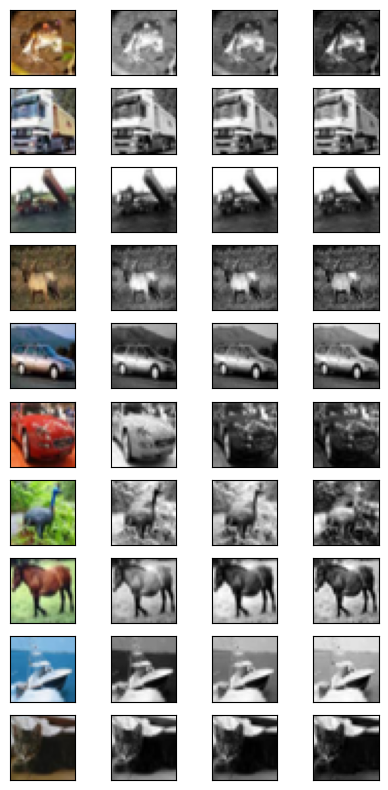

In [ ]:
import numpy as np

training = {'labels':[],'data':[]}
for i in range(1,6):
  filename = f"cifar-10-batches-py/data_batch_{i}"
  dict = unpickle(filename)
#  print(dict)
  training['labels'].extend(dict[b'labels'])
  training['data'].extend(dict[b'data'])

raw_test_data = unpickle("cifar-10-batches-py/test_batch")
print(raw_test_data)
red_test_data = [[np.reshape(d[:1024]/255,(1024,1)), label] for d, label in zip(raw_test_data[b'data'],raw_test_data[b'labels'])]
green_test_data = [[np.reshape(d[1024:2048]/255,(1024,1)), label] for d, label in zip(raw_test_data[b'data'],raw_test_data[b'labels'])]
blue_test_data = [[np.reshape(d[2048:]/255,(1024,1)), label] for d, label in zip(raw_test_data[b'data'],raw_test_data[b'labels'])]
print(red_test_data[0][0])
print(red_test_data[0][1])
print(np.reshape(training['data'][0][:1024], (32,32)))
red_training_data = [[np.reshape(d[:1024]/255,(1024,1)), vectorize(label)] for d, label in zip(training['data'],training['labels'])]
green_training_data = [[np.reshape(d[1024:2048]/255,(1024,1)), vectorize(label)] for d, label in zip(training['data'],training['labels'])]
blue_training_data = [[np.reshape(d[2048:]/255,(1024,1)), vectorize(label)] for d, label in zip(training['data'],training['labels'])]
print(red_training_data[0][0])
print(red_training_data[0][1])
training['data'] = np.array(training['data'])
training['data'] = training['data'].reshape(50000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 4, figsize=(5,10))
for i in range(10):
  axes[i,0].imshow(training['data'][i])
  axes[i,1].imshow(np.reshape(red_training_data[i][0],(32,32)), cmap="gray")
  axes[i,2].imshow(np.reshape(green_training_data[i][0],(32,32)), cmap="gray")
  axes[i,3].imshow(np.reshape(blue_training_data[i][0],(32,32)), cmap="gray")
  for c in range(4):
    axes[i,c].set_xticks([])
    axes[i,c].set_yticks([])

In [ ]:
import numpy as np

def vote(a1, a2, a3):
  a1vote = np.argmax(a1)
  a1max = np.max(a1)
  a2vote = np.argmax(a2)
  a2max = np.max(a2)
  a3vote = np.argmax(a3)
  a3max = np.max(a3)
  if a1vote==a2vote or a1vote==a3vote:
    return a1vote
  elif a2vote==a1vote or a2vote==a3vote:
    return a2vote
  elif a3vote==a1vote or a3vote==a2vote:
    return a3vote
  else:
    return [a1vote, a2vote, a3vote] [np.argmax([a1max, a2max, a3max])]

a1 = np.reshape([0.29453959, 0.06867418, 0.04936966, 0.03380698, 0.05384389, 0.01038279, 0.04950303, 0.07864668,0.41085221, 0.02041872], (10,1))
a2 = np.reshape([0.29453959, 0.06867418, 0.04936966, 0.03380698, 0.05384389, 0.01038279, 0.43085221, 0.42085221, 0.2, 0.02041872], (10,1))
a3 = np.reshape([0.29453959, 0.06867418, 0.04936966, 0.03380698, 0.05384389, 0.01038279, 0.43085221, 0.07864668,0.3, 0.02041872], (10,1))

In [ ]:
import numpy as np
import nn.network as network
net_RED = network.Network([1024, 30, 10])
net_GREEN = network.Network([1024, 30, 10])
net_BLUE = network.Network([1024, 30, 10])

# modify the rawtrianing data labels so that they are vectorized
# create three sets of training data ... one set is the RED training data, etc...

net_RED.SGD(red_training_data, 30, 10, 3.0, test_data=red_test_data)


net_GREEN.SGD(red_training_data, 30, 10, 3.0, test_data=red_test_data)
net_BLUE.SGD(red_training_data, 30, 10, 3.0, test_data=red_test_data)

correct_images = []

for i in range(len(red_test_data)):
  a1 = net_RED.feedforward(red_test_data[i][0])
  a2 = net_GREEN.feedforward(green_test_data[i][0])
  a3 = net_BLUE.feedforward(blue_test_data[i][0])
  ans=vote(a1,a2,a3)
  if ans==red_test_data[i][1]:
    correct_images.append(i)

#overall accuracy is length of the correct_images list / length of red_test_data
print(f"overall accuracy: {len(correct_images)/len(red_test_data)}")
print(ans)


Epoch 0 : 1917 / 10000
Epoch 1 : 1940 / 10000
Epoch 2 : 1963 / 10000
Epoch 3 : 2234 / 10000
Epoch 4 : 2066 / 10000
Epoch 5 : 1863 / 10000
Epoch 6 : 2332 / 10000
Epoch 7 : 2422 / 10000
Epoch 8 : 1929 / 10000
Epoch 9 : 2402 / 10000
Epoch 10 : 2339 / 10000
Epoch 11 : 2251 / 10000
Epoch 12 : 2418 / 10000
Epoch 13 : 2372 / 10000
Epoch 14 : 2130 / 10000
Epoch 15 : 2478 / 10000
Epoch 16 : 2477 / 10000
Epoch 17 : 2097 / 10000
Epoch 18 : 2531 / 10000
Epoch 19 : 2587 / 10000
Epoch 20 : 2635 / 10000
Epoch 21 : 2603 / 10000
Epoch 22 : 2506 / 10000
Epoch 23 : 2610 / 10000
Epoch 24 : 2565 / 10000
Epoch 25 : 2748 / 10000
Epoch 26 : 2614 / 10000
Epoch 27 : 2761 / 10000
Epoch 28 : 2503 / 10000
Epoch 29 : 2826 / 10000
Epoch 0 : 1777 / 10000
Epoch 1 : 1776 / 10000
Epoch 2 : 1741 / 10000
Epoch 3 : 1997 / 10000
Epoch 4 : 2082 / 10000
Epoch 5 : 2243 / 10000
Epoch 6 : 2036 / 10000
Epoch 7 : 2238 / 10000
Epoch 8 : 2327 / 10000
Epoch 9 : 2470 / 10000
Epoch 10 : 2202 / 10000
Epoch 11 : 2308 / 10000
Epoch 12 : 2

In [ ]:
correct_images = []

for i in range(len(red_test_data)):
  a1 = net_RED.feedforward(red_test_data[i][0])
  a2 = net_GREEN.feedforward(green_test_data[i][0])
  a3 = net_BLUE.feedforward(blue_test_data[i][0])
  ans=vote(a1,a2,a3)
  if ans==red_test_data[i][1]:
    correct_images.append(i)

  #overall accuracy is length of the correct images list / length of red_test_data
  print(f"overall accuracy: {len(correct_images)/len(red_test_data)}")

Streaming output truncated to the last 5000 lines.
overall accuracy: 0.1488
overall accuracy: 0.1488
overall accuracy: 0.1488
overall accuracy: 0.1488
overall accuracy: 0.1488
overall accuracy: 0.1489
overall accuracy: 0.1489
overall accuracy: 0.1489
overall accuracy: 0.149
overall accuracy: 0.1491
overall accuracy: 0.1491
overall accuracy: 0.1491
overall accuracy: 0.1491
overall accuracy: 0.1492
overall accuracy: 0.1492
overall accuracy: 0.1493
overall accuracy: 0.1493
overall accuracy: 0.1493
overall accuracy: 0.1493
overall accuracy: 0.1493
overall accuracy: 0.1494
overall accuracy: 0.1494
overall accuracy: 0.1494
overall accuracy: 0.1494
overall accuracy: 0.1495
overall accuracy: 0.1495
overall accuracy: 0.1495
overall accuracy: 0.1495
overall accuracy: 0.1495
overall accuracy: 0.1495
overall accuracy: 0.1495
overall accuracy: 0.1495
overall accuracy: 0.1496
overall accuracy: 0.1496
overall accuracy: 0.1496
overall accuracy: 0.1497
overall accuracy: 0.1497
overall accuracy: 0.1497


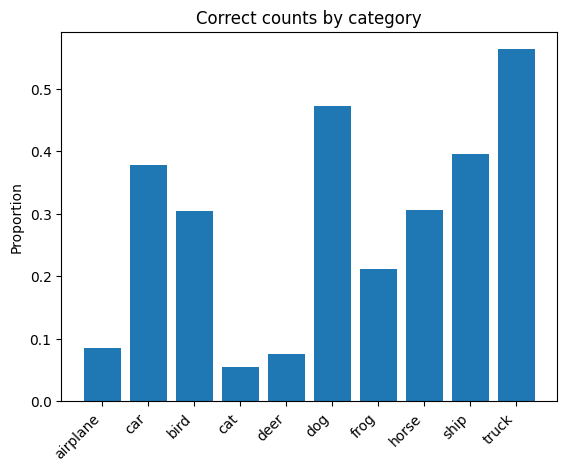

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels=["airplane","car","bird","cat","deer","dog","frog","horse","ship","truck"]
correct_counts = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#Assuming correct_images and red_test_data are defined elsewhere in your code
for i in correct_images:
  correct_counts[red_test_data[i][1]] += 1

#convert counts to a proportion or percentage (assuming your divisor is correct; adjust as needed)
correct_counts = np.array(correct_counts) / 1000

#create a bar chart
fig, ax = plt.subplots()
ax.bar(labels, correct_counts)

# Add some labels and a title
ax.set_ylabel('Proportion')
ax.set_title('Correct counts by category')
ax.set_xticks(range(len(labels))) #Set x-ticks positions
ax.set_xticklabels(labels, rotation=45, ha="right") #Set x-ticks labels with rotation for better visibility

plt.show()

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import tensorflow as tf

print("Tensorflow version:",tf.__version__)
print("Keras version:",keras.__version__)


from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')


Tensorflow version: 2.15.0
Keras version: 2.15.0


In [23]:
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [24]:
X_train = X_train/255
X_test = X_test/255
Y_train_en = to_categorical(Y_train,10)
Y_test_en = to_categorical(Y_test,10)

In [33]:
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation= "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation ="relu"))
model.add(Dense(10, activation ='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer="adam", metrics = ["accuracy"])

In [34]:
model.summary()
history = model.fit(X_train, Y_train_en, epochs = 20, verbose=1,validation_data=(X_test,Y_test_en))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1